In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings

In [ ]:
df = pd.read_csv('data_agrupada_tipos.csv')
df

,Unnamed: 0,Fecha,Hora,Longitud,Latitud,Provincia,Cantón,Parroquia,Distrito,Circuito,Subcircuito,Servicio,Subtipo,Emergencias,Tipo
0,0,2022-10-10 00:00:00,15.0,-78.454084,-0.052634,PICHINCHA,QUITO,POMASQUI,LA DELICIA,POMASQUI,POMASQUI 1,Seguridad Ciudadana,Abandono de adultos,1.0,Otros
1,1,2022-10-19 00:00:00,18.0,-78.515110,-0.217348,PICHINCHA,QUITO,QUITO,MANUELA SAENZ,CENTRO HISTORICO,CENTRO HISTORICO 3,Seguridad Ciudadana,Abandono de adultos,1.0,Otros
2,2,2022-11-20 00:00:00,10.0,-78.496301,-0.188742,PICHINCHA,QUITO,QUITO,EUGENIO ESPEJO,LAS CASAS,LAS CASAS 1,Seguridad Ciudadana,Abandono de adultos,1.0,Otros
3,3,2022-11-21 00:00:00,7.0,-78.464142,-0.122486,PICHINCHA,QUITO,QUITO,LA DELICIA,EL MIRADOR,EL MIRADOR 3,Seguridad Ciudadana,Abandono de adultos,1.0,Otros
4,4,2022-10-11 00:00:00,19.0,-78.512022,-0.211326,PICHINCHA,QUITO,QUITO,MANUELA SAENZ,SAN JUAN,SAN JUAN 3,Seguridad Ciudadana,"Abandono de niños, niñas o adolescentes",1.0,Otros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429459,1480378,2021-10-01 00:00:00,21.0,-78.536066,-0.254238,PICHINCHA,QUITO,QUITO,ELOY ALFARO,SANTA ANITA,SANTA ANITA 3,Seguridad Ciudadana,Violencia intrafamiliar,1.0,Violencia y Agresiones
1429460,1480379,2021-10-01 00:00:00,21.0,-78.535380,-0.326020,PICHINCHA,QUITO,QUITO,QUITUMBE,TURUBAMBA,TURUBAMBA 3,Seguridad Ciudadana,Violencia intrafamiliar,1.0,Violencia y Agresiones
1429461,1480380,2021-10-01 00:00:00,22.0,-78.498546,-0.198599,PICHINCHA,QUITO,QUITO,EUGENIO ESPEJO,UNIVERSITARIO,UNIVERSITARIO 1,Seguridad Ciudadana,Violencia intrafamiliar,1.0,Violencia y Agresiones
1429462,1480381,2021-10-01 00:00:00,22.0,-78.343085,-0.185623,PICHINCHA,QUITO,TABABELA,TUMBACO,TABABELA,TABABELA 1,Seguridad Ciudadana,Violencia intrafamiliar,1.0,Violencia y Agresiones


In [ ]:

df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
# Añadir una nueva columna con el nombre del día de la semana
df['Día de la Semana'] = df['Fecha'].dt.day_name()
df['month'] = df['Fecha'].apply(lambda date: date.month if pd.notnull(date) else None)
df['year'] = df['Fecha'].apply(lambda date: date.year if pd.notnull(date) else None)

df = df.drop(['Fecha'], axis=1)
df.drop(['Provincia', 'Cantón', 'Servicio', 'Emergencias'], axis=1, inplace=True)
df.drop(['Subtipo', 'Subcircuito', 'Parroquia','Distrito'], axis=1, inplace=True)
df.drop(['year', 'Longitud', 'Latitud', 'Unnamed: 0'], axis=1, inplace=True)

In [ ]:

object_columns = df.select_dtypes(include=['object']).columns


label_encoders = {}
df_le = df.copy()
for column in df.columns:
    le = LabelEncoder()
    df_le[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df_le

,Hora,Circuito,Tipo,Día de la Semana,month
0,15,65,7,1,9
1,18,11,7,6,9
2,10,46,7,3,10
3,7,28,7,1,10
4,19,77,7,5,9
...,...,...,...,...,...
1429459,21,79,12,0,9
1429460,21,87,12,0,9
1429461,22,88,12,0,9
1429462,22,83,12,0,9


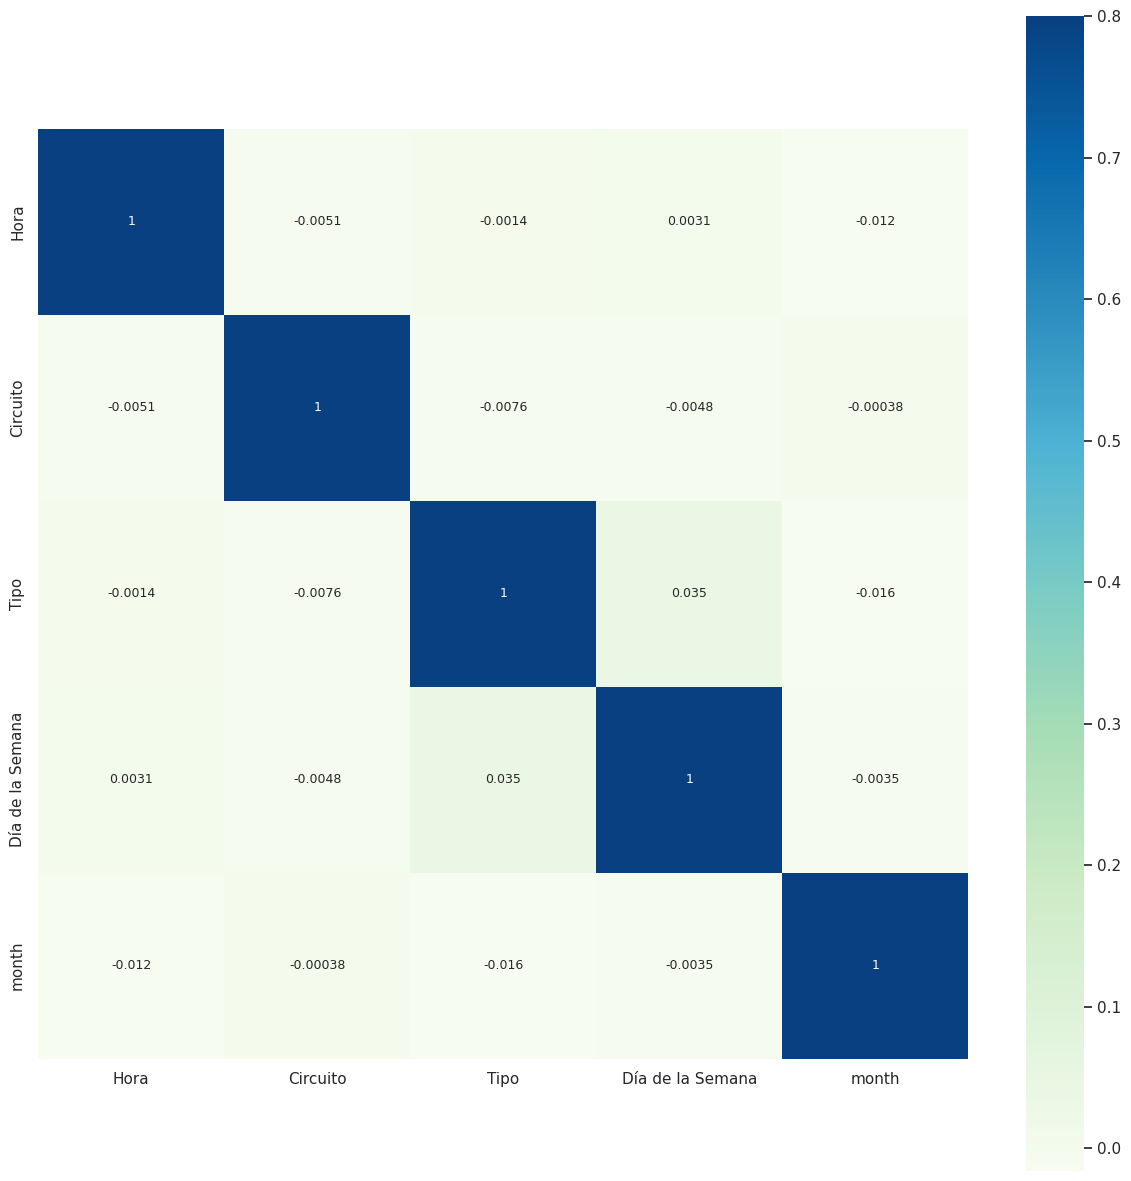

In [ ]:
sns.set(style='white',font_scale=1)
plt.figure(figsize=(15,15))
sns.heatmap(df_le.corr(),vmax=0.8, square=True,cmap='GnBu', linecolor='r'
            , annot=True,annot_kws={'size':9})
plt.show()

In [ ]:
df_le.describe()

,Hora,Circuito,Tipo,Día de la Semana,month
count,1.429464e+06,1.429464e+06,1.429464e+06,1.429464e+06,1.429464e+06
mean,1.316988e+01,4.084367e+01,7.319087e+00,2.822668e+00,5.617375e+00
std,6.866211e+00,2.618284e+01,2.441631e+00,1.938821e+00,3.489451e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+00,1.900000e+01,4.000000e+00,1.000000e+00,3.000000e+00
50%,1.400000e+01,3.600000e+01,8.000000e+00,3.000000e+00,6.000000e+00
75%,1.900000e+01,6.300000e+01,8.000000e+00,4.000000e+00,9.000000e+00
max,2.300000e+01,9.100000e+01,1.200000e+01,6.000000e+00,1.100000e+01


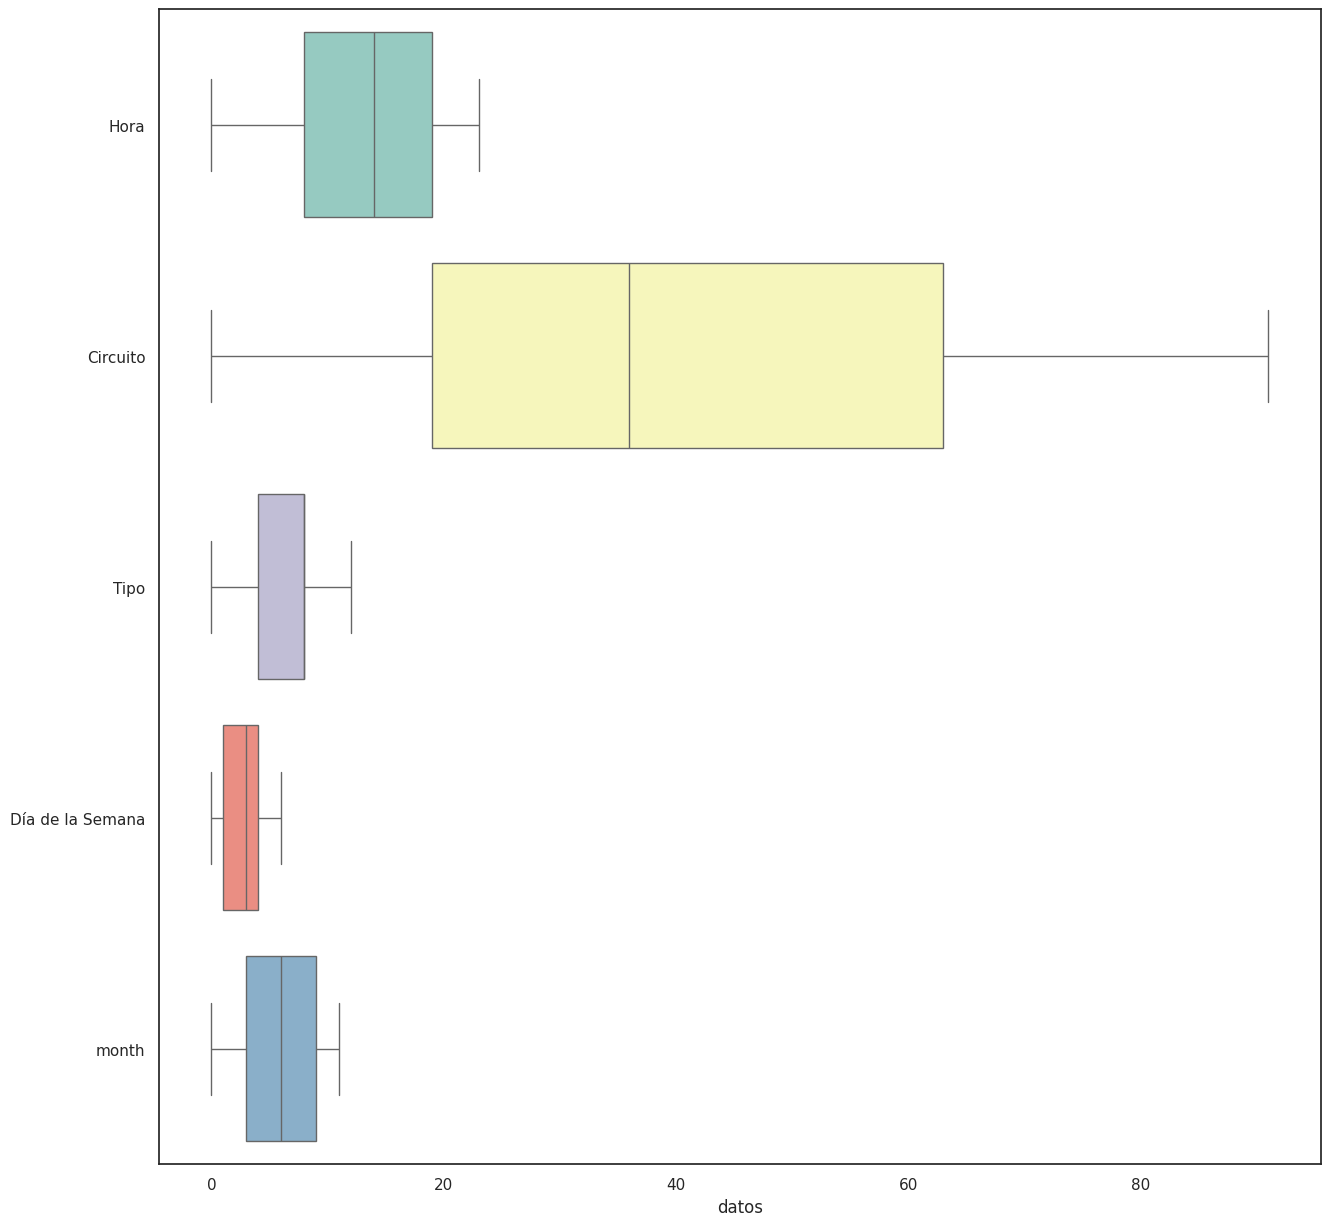

In [ ]:
plt.figure(figsize=(15, 15))
sns.boxplot(data = df_le, orient='h',palette='Set3')
plt.xlabel('datos')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(df_le)
X

array([[ 0.26653955,  0.92260207, -0.13068624, -0.94009136,  0.96938613],
       [ 0.70346192, -1.13981844, -0.13068624,  1.63879602,  0.96938613],
       [-0.4616644 ,  0.19693559, -0.13068624,  0.0914636 ,  1.25596423],
       ...,
       [ 1.28602507,  1.80104043,  1.91712616, -1.45586883,  0.96938613],
       [ 1.28602507,  1.61007557,  1.91712616, -1.45586883,  0.96938613],
       [ 1.43166586,  0.12054965,  1.91712616, -1.45586883,  0.96938613]])

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

def hopkins(X, portion=0.1, seed=150):
  # X: numpy array of shape (n_samples, n_features)
  n = X.shape[0]
  d = X.shape[1]
  m = int(portion * n)

  np.random.seed(seed)
  nbrs = NearestNeighbors(n_neighbors=1).fit(X)
  # u_dist
  rand_X = np.random.uniform(X.min(axis=0), X.max(axis=0), size=(m,d))
  u_dist = nbrs.kneighbors(rand_X, return_distance=True)[0]
  # w_dist
  idx = np.random.choice(n, size=m, replace=False)
  w_dist = nbrs.kneighbors(X[idx,:], 2, return_distance=True)[0][:,1]

  U = (u_dist**d).sum()
  W = (w_dist**d).sum()
  H = U / (U + W)
  return H

In [ ]:
hopkins(X)

0.9884427496763118

Muy buen puntaje, procedemos a clusterizar, viendo primero el número de clusters óptimo.

Página GOATED with the sauce bussing it down sexual style: https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

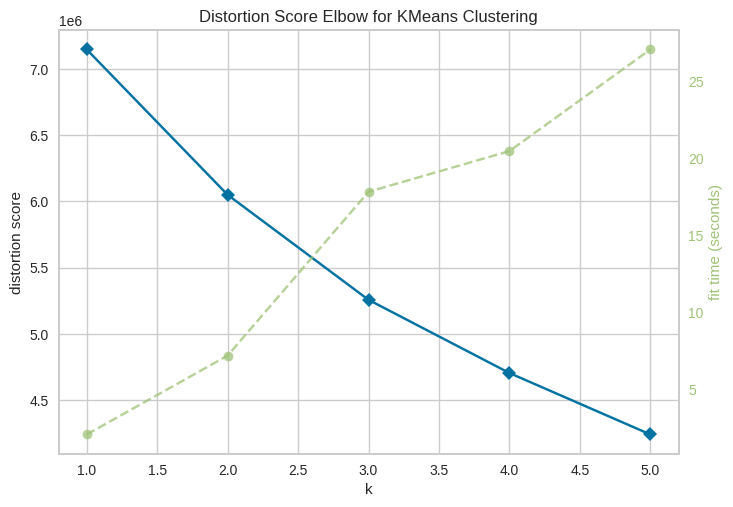

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,6), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [ ]:
num_samples = 10
sample_size = 10000
k_values = range(2, 4)  # De k=2 a k=3
silhouette_scores = {k: [] for k in k_values}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)

    for i in range(num_samples):
        df_sample = df_le.sample(n=sample_size, random_state=42+i)
        X_sample = df_sample.values  # Cambiado de X a X_sample
        clusters = kmeans.fit_predict(X_sample)
        silhouette_avg = silhouette_score(X_sample, clusters)
        silhouette_scores[k].append(silhouette_avg)
        print(f"Muestra {i+1} con k={k}: Coeficiente de silueta promedio: {silhouette_avg}")

    # Promedio de los coeficientes de silueta para el valor actual de k
    silhouette_avg_final = np.mean(silhouette_scores[k])
    print(f"Coeficiente de silueta promedio final con k={k}: {silhouette_avg_final}")

# Encontrar el mejor valor de k basado en el promedio de los coeficientes de silueta
k_optimo = max(silhouette_scores, key=lambda k: np.mean(silhouette_scores[k]))
silhouette_avg_final_optimo = np.mean(silhouette_scores[k_optimo])

print(f"\nEl mejor valor de k es {k_optimo} con un coeficiente de silueta promedio final de {silhouette_avg_final_optimo}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Muestra 1 con k=2: Coeficiente de silueta promedio: 0.5488015471650485


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Muestra 2 con k=2: Coeficiente de silueta promedio: 0.5501175398849265


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Muestra 3 con k=2: Coeficiente de silueta promedio: 0.5430969698546655


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Muestra 4 con k=2: Coeficiente de silueta promedio: 0.5513589108463789


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Muestra 5 con k=2: Coeficiente de silueta promedio: 0.5435737454316368


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Muestra 6 con k=2: Coeficiente de silueta promedio: 0.5306639452293581


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Muestra 7 con k=2: Coeficiente de silueta promedio: 0.5568943398329133


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Muestra 8 con k=2: Coeficiente de silueta promedio: 0.5511798676549831


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Muestra 9 con k=2: Coeficiente de silueta promedio: 0.5479406421938564


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Muestra 10 con k=2: Coeficiente de silueta promedio: 0.5516959554068466
Coeficiente de silueta promedio final con k=2: 0.5475323463500614


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Muestra 1 con k=3: Coeficiente de silueta promedio: 0.4745484132355582


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Muestra 2 con k=3: Coeficiente de silueta promedio: 0.4726568626089943


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Muestra 3 con k=3: Coeficiente de silueta promedio: 0.4707087527222689


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Muestra 4 con k=3: Coeficiente de silueta promedio: 0.4764059698996625


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Muestra 5 con k=3: Coeficiente de silueta promedio: 0.47478260895824514


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Muestra 6 con k=3: Coeficiente de silueta promedio: 0.47479924380895566


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Muestra 7 con k=3: Coeficiente de silueta promedio: 0.47660427998692856


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Muestra 8 con k=3: Coeficiente de silueta promedio: 0.47380796243529233


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Muestra 9 con k=3: Coeficiente de silueta promedio: 0.47356352584626066


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Muestra 10 con k=3: Coeficiente de silueta promedio: 0.4748147725292091
Coeficiente de silueta promedio final con k=3: 0.4742692392031375

El mejor valor de k es 2 con un coeficiente de silueta promedio final de 0.5475323463500614


In [ ]:
k_optimo = 3
kmeans_optimo = KMeans(n_clusters=k_optimo, init='k-means++', random_state=42)
kmeans_optimo.fit(X)

# Obtener las etiquetas de cluster asignadas a cada punto de datos
labels = kmeans_optimo.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
#from sklearn.metrics import silhouette_score
#metodo de la silueta para ver que tan bueno fue la clasificacion de kmeans
#silhouette_avg = silhouette_score(X, labels)
#le paso el df scaldo y los labels o clusters que he sacado del kmeans
#silhouette_avg

In [ ]:

df['Etiqueta'] = labels


In [ ]:

df

,Hora,Circuito,Tipo,Día de la Semana,month,Etiqueta
0,15.0,POMASQUI,Otros,Monday,10,1
1,18.0,CENTRO HISTORICO,Otros,Wednesday,10,0
2,10.0,LAS CASAS,Otros,Sunday,11,1
3,7.0,EL MIRADOR,Otros,Monday,11,1
4,19.0,SAN JUAN,Otros,Tuesday,10,0
...,...,...,...,...,...,...
1429459,21.0,SANTA ANITA,Violencia y Agresiones,Friday,10,1
1429460,21.0,TURUBAMBA,Violencia y Agresiones,Friday,10,1
1429461,22.0,UNIVERSITARIO,Violencia y Agresiones,Friday,10,1
1429462,22.0,TABABELA,Violencia y Agresiones,Friday,10,1


In [ ]:
circuito_counts_agrupados = df.groupby('Etiqueta')['Circuito'].value_counts()
print(circuito_counts_agrupados)

Etiqueta  Circuito                   
0         IÑAQUITO                       27670
          LA MARISCAL                    17044
          CENTRO HISTORICO               16088
          GUAMANI                        13912
          LAS CUADRAS                    13196
                                         ...  
2         PERUCHO                           63
          GUALEA                            49
          TABLON                            23
          LADERAS DE SAN FRANCISCO           9
          SAN JOSE DE MINAS OCCIDENTE        2
Name: count, Length: 276, dtype: int64


In [ ]:
dia_counts_agrupados = df.groupby('Etiqueta')['Día de la Semana'].value_counts()
hora_counts_agrupados = df.groupby('Etiqueta')['Hora'].value_counts()
mes_counts_agrupados = df.groupby('Etiqueta')['month'].value_counts()
tipo_counts_agrupados = df.groupby('Etiqueta')['Tipo'].value_counts()

In [ ]:
def plot_grouped_counts(grouped_data, title):
    grouped_data = grouped_data.unstack().fillna(0)
    grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(title)
    plt.xlabel('Etiqueta')
    plt.ylabel('Count')
    plt.legend(title=grouped_data.columns.name)
    plt.show()

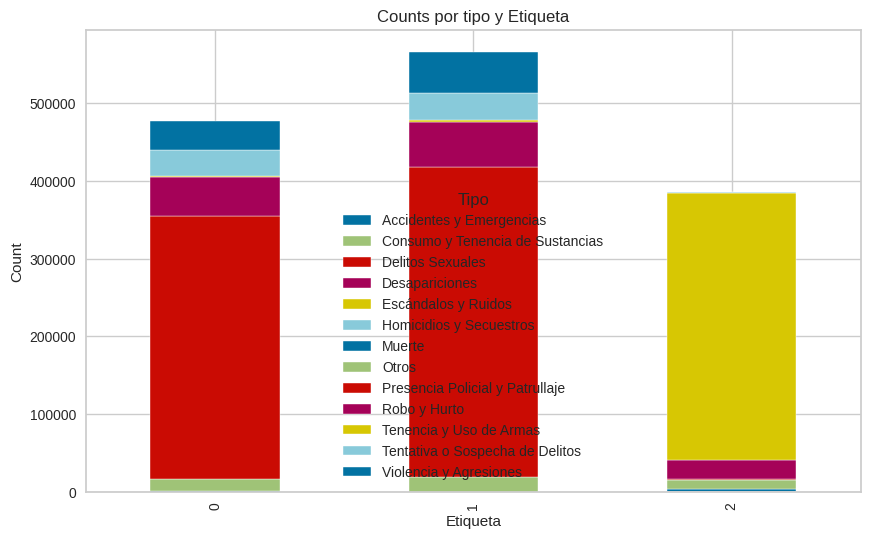

In [ ]:
plot_grouped_counts(tipo_counts_agrupados, 'Counts por tipo y Etiqueta')


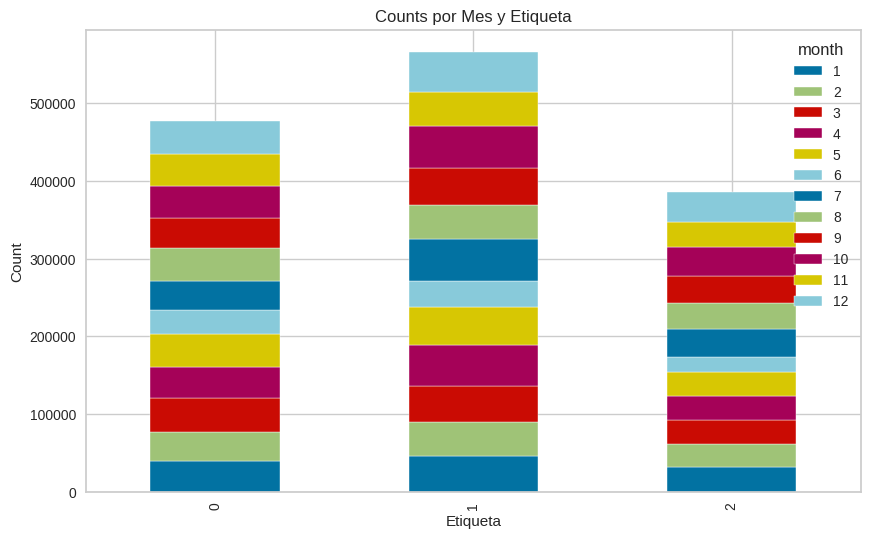

In [ ]:
plot_grouped_counts(mes_counts_agrupados,'Counts por Mes y Etiqueta')

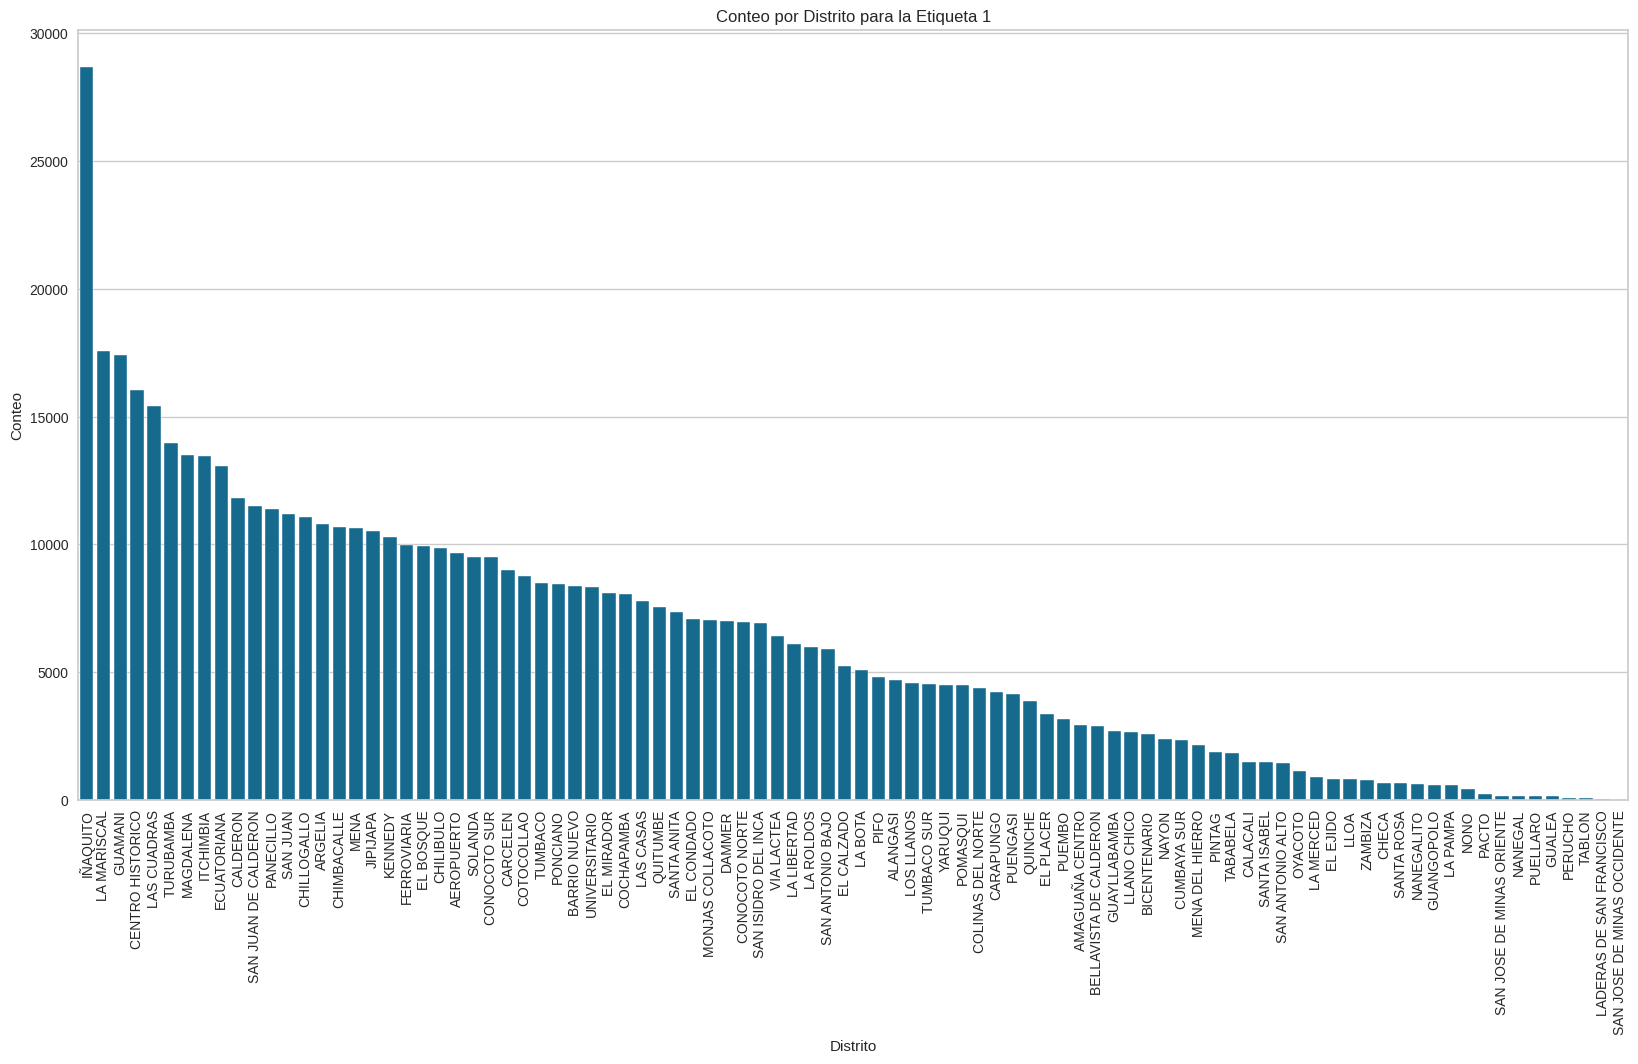

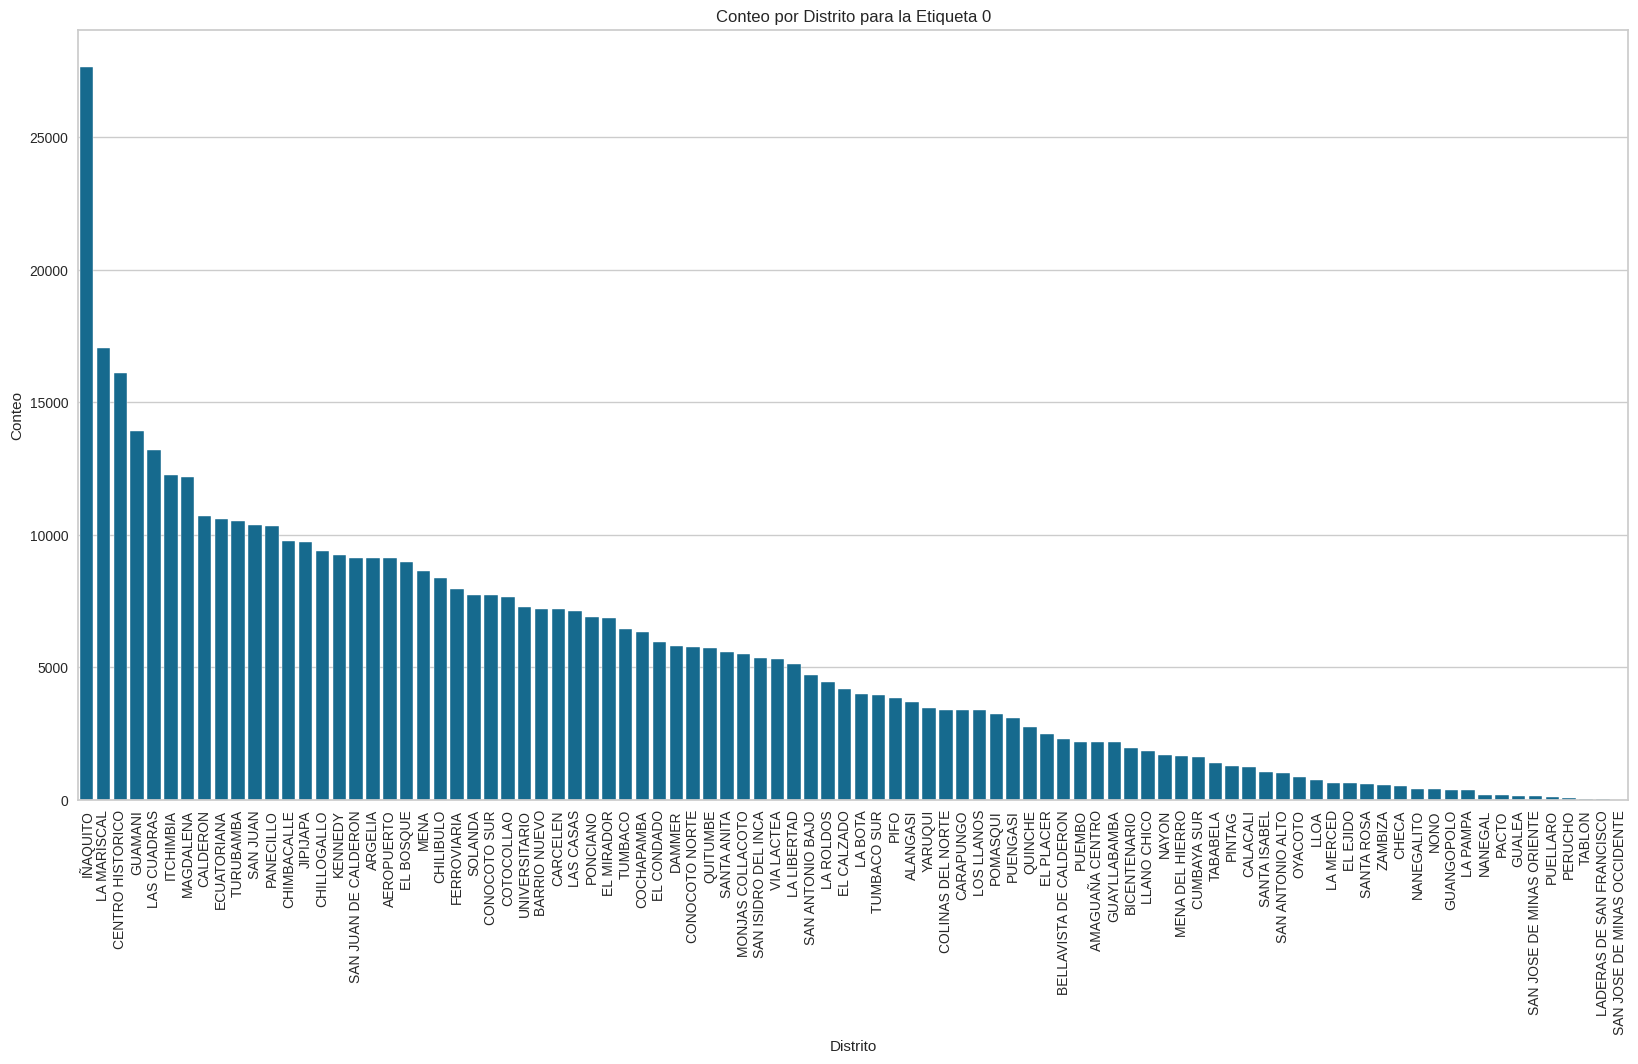

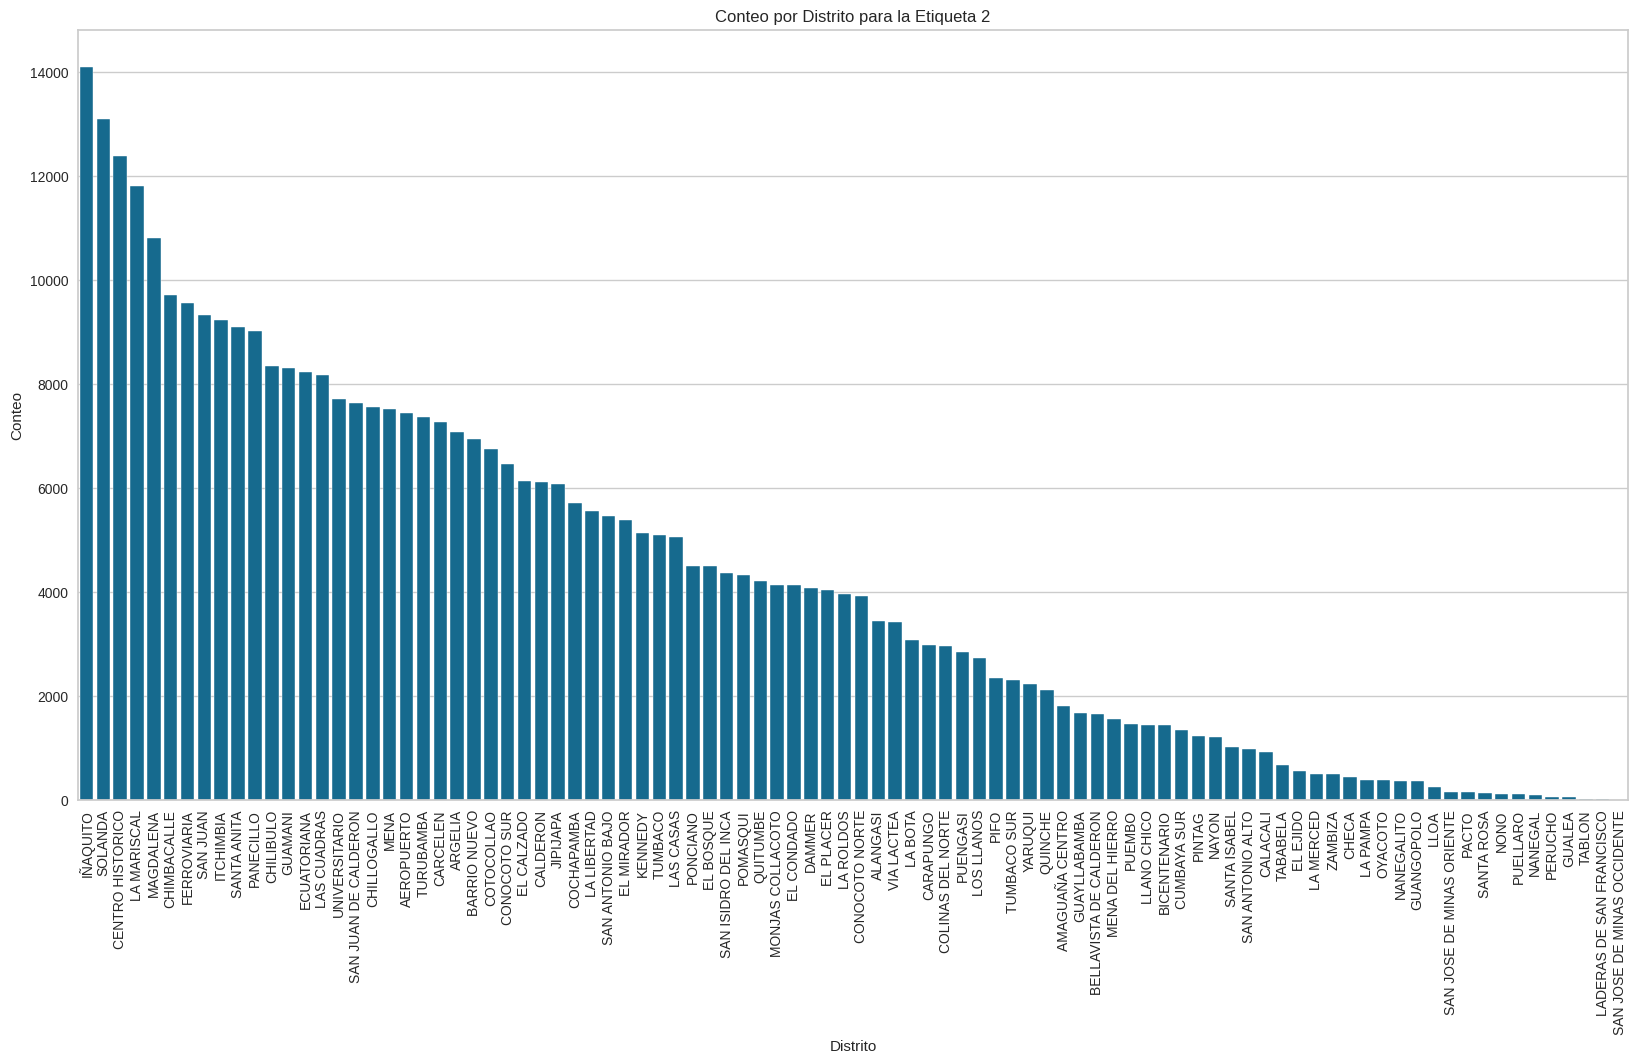

In [ ]:
etiquetas = df['Etiqueta'].unique()

# Generar un gráfico por cada etiqueta en una figura separada
for etiqueta in etiquetas:
    plt.figure(figsize=(20, 10))
    etiqueta_data = df[df['Etiqueta'] == etiqueta]
    sns.countplot(data=etiqueta_data, x='Circuito', order=etiqueta_data['Circuito'].value_counts().index)
    plt.title(f'Conteo por Distrito para la Etiqueta {etiqueta}')
    plt.xlabel('Distrito')
    plt.ylabel('Conteo')
    plt.xticks(rotation=90)
    plt.show()

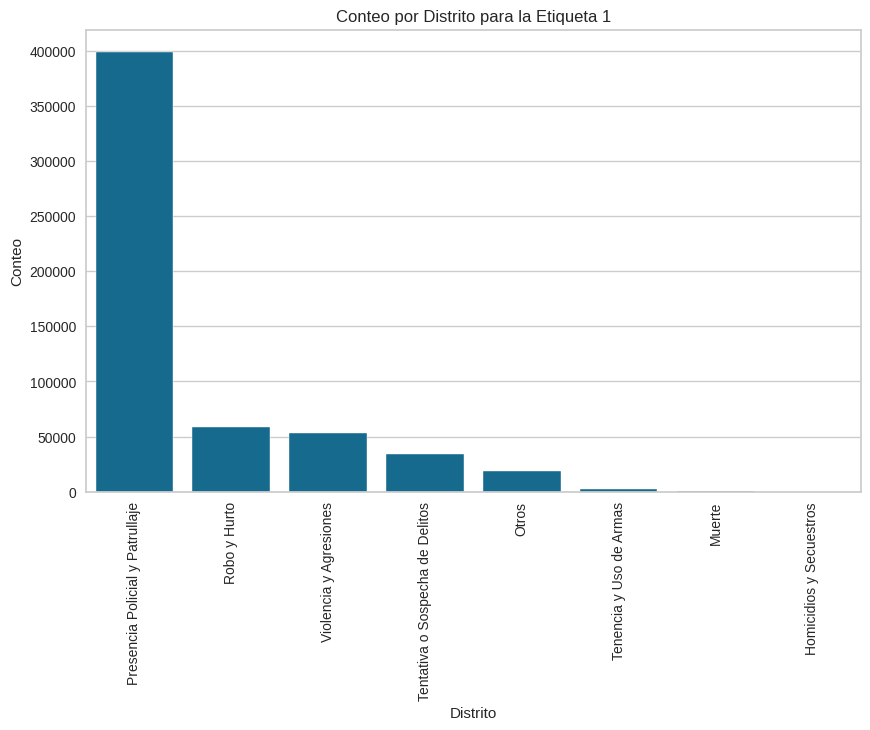

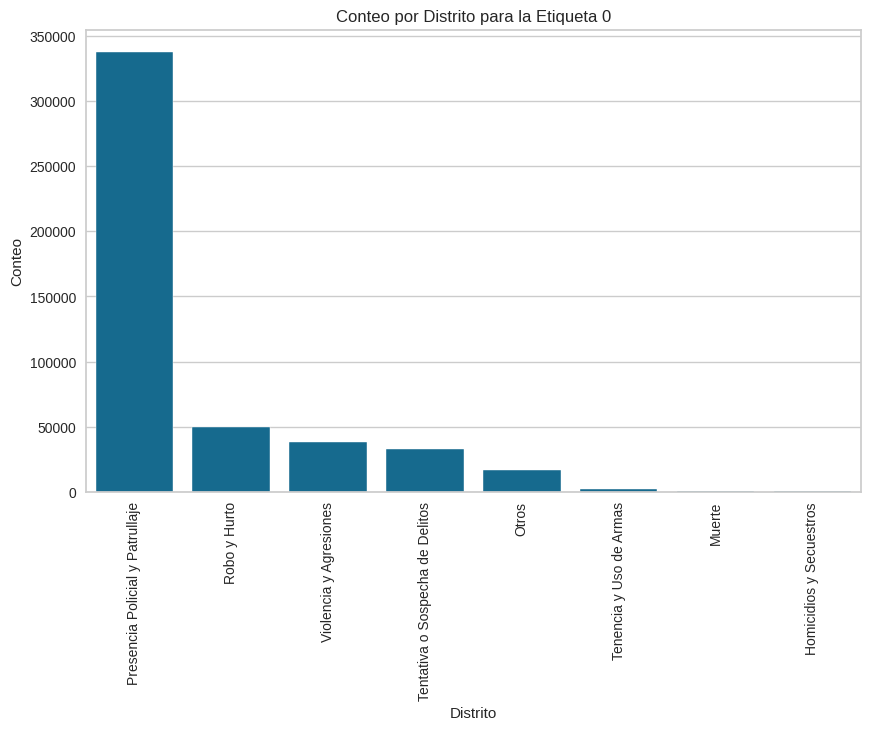

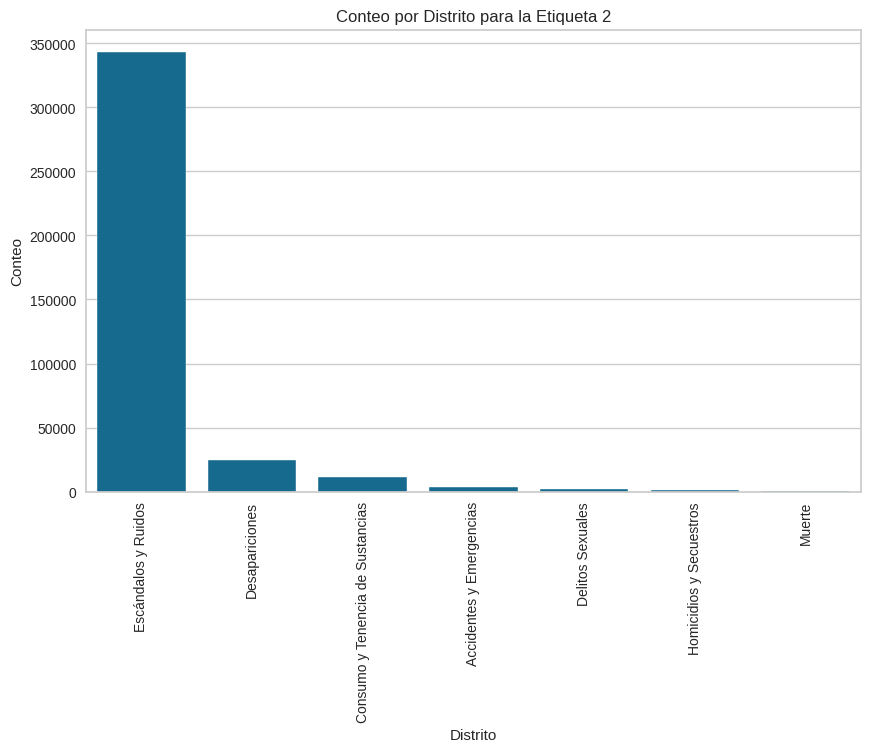

In [ ]:
for etiqueta in etiquetas:
    plt.figure(figsize=(10, 6))
    etiqueta_data = df[df['Etiqueta'] == etiqueta]
    sns.countplot(data=etiqueta_data, x='Tipo', order=etiqueta_data['Tipo'].value_counts().index)
    plt.title(f'Conteo por Distrito para la Etiqueta {etiqueta}')
    plt.xlabel('Distrito')
    plt.ylabel('Conteo')
    plt.xticks(rotation=90)
    plt.show()

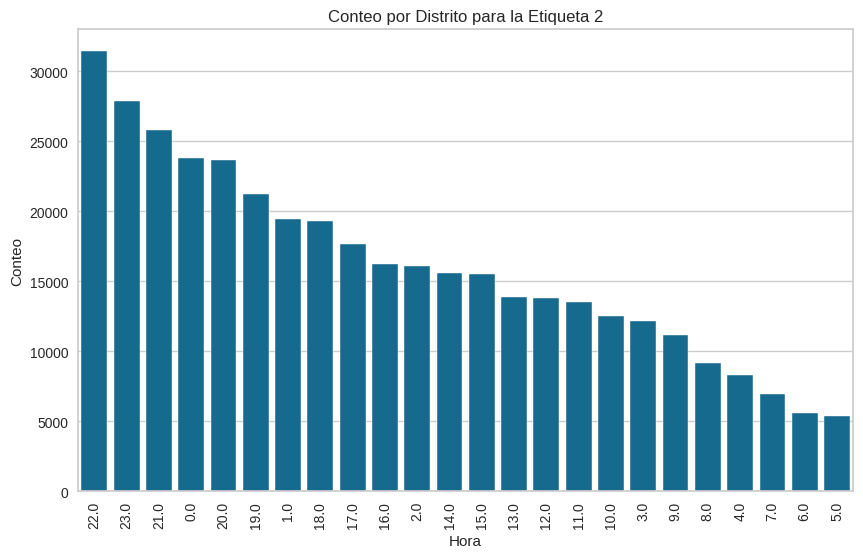

In [ ]:
etiqueta_data = df[df['Etiqueta'] == 2].copy()

plt.figure(figsize=(10, 6))
sns.countplot(data=etiqueta_data, x='Hora', order=etiqueta_data['Hora'].value_counts().index)
plt.title(f'Conteo por Distrito para la Etiqueta 2')
plt.xlabel('Hora')
plt.ylabel('Conteo')
plt.xticks(rotation=90)
plt.show()

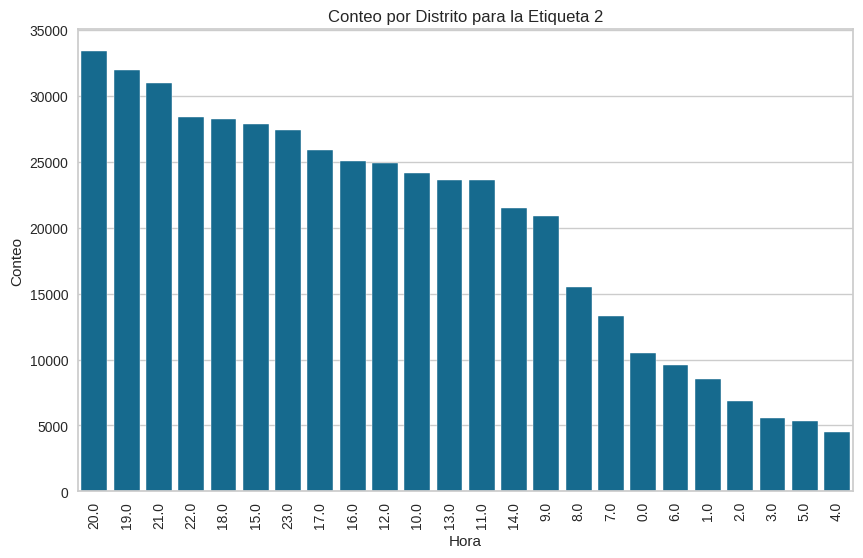

In [ ]:
etiqueta_data = df[df['Etiqueta'] == 0].copy()
plt.figure(figsize=(10, 6))
sns.countplot(data=etiqueta_data, x='Hora', order=etiqueta_data['Hora'].value_counts().index)
plt.title(f'Conteo por Distrito para la Etiqueta 2')
plt.xlabel('Hora')
plt.ylabel('Conteo')
plt.xticks(rotation=90)
plt.show()

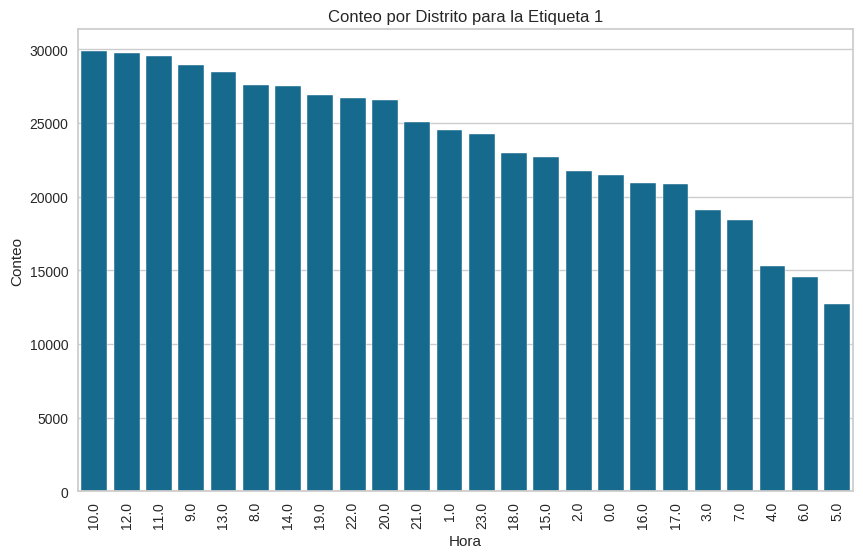

In [ ]:
etiqueta_data = df[df['Etiqueta'] == 1].copy()
plt.figure(figsize=(10, 6))
sns.countplot(data=etiqueta_data, x='Hora', order=etiqueta_data['Hora'].value_counts().index)
plt.title(f'Conteo por Distrito para la Etiqueta 1')
plt.xlabel('Hora')
plt.ylabel('Conteo')
plt.xticks(rotation=90)
plt.show()

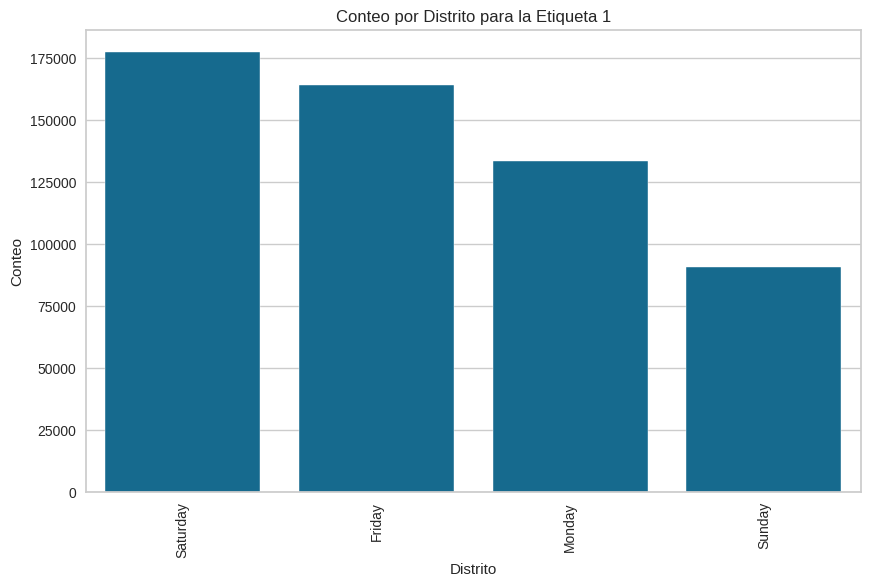

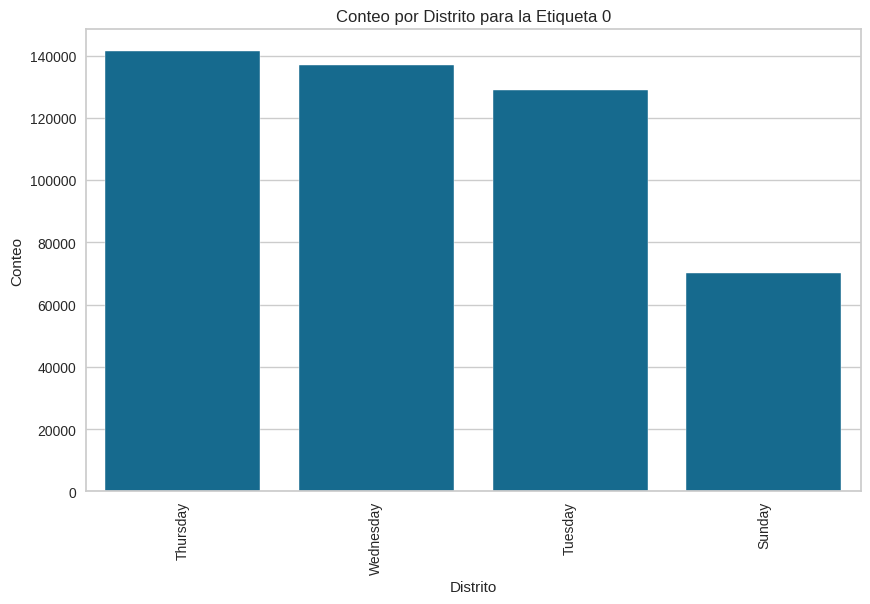

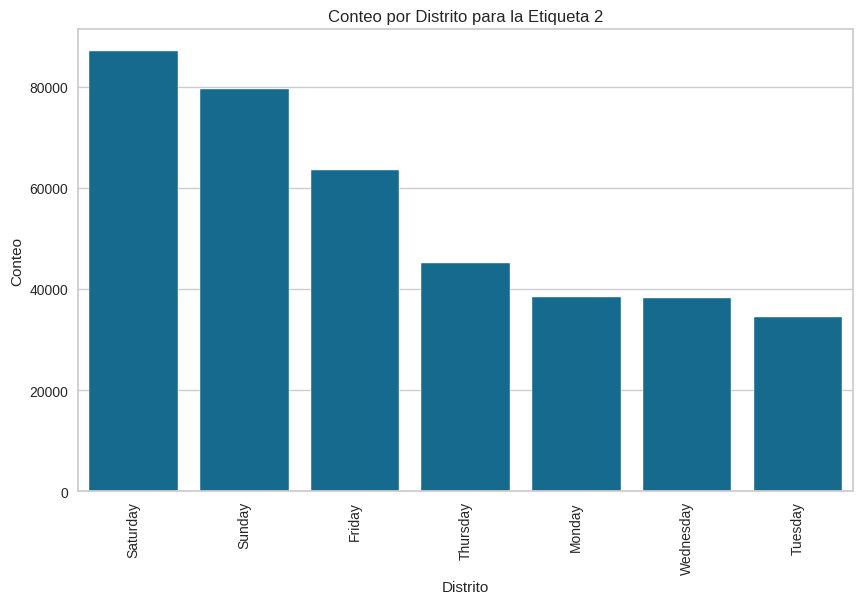

In [ ]:
for etiqueta in etiquetas:
    plt.figure(figsize=(10, 6))
    etiqueta_data = df[df['Etiqueta'] == etiqueta]
    sns.countplot(data=etiqueta_data, x='Día de la Semana', order=etiqueta_data['Día de la Semana'].value_counts().index)
    plt.title(f'Conteo por Distrito para la Etiqueta {etiqueta}')
    plt.xlabel('Distrito')
    plt.ylabel('Conteo')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
import joblib
joblib.dump(standard_scaler, 'scaler.pkl')
joblib.dump(kmeans_optimo, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [ ]:
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [ ]:
etiqueta_data = df[df['Etiqueta'] == 0].copy()
etiqueta_data

,Hora,Circuito,Tipo,Día de la Semana,month,Etiqueta
1,18.0,CENTRO HISTORICO,Otros,Wednesday,10,0
4,19.0,SAN JUAN,Otros,Tuesday,10,0
8,23.0,TUMBACO SUR,Otros,Tuesday,12,0
13,17.0,SOLANDA,Otros,Wednesday,10,0
20,6.0,SAN ISIDRO DEL INCA,Otros,Wednesday,10,0
...,...,...,...,...,...,...
1429451,10.0,LA ROLDOS,Violencia y Agresiones,Thursday,9,0
1429452,13.0,CALDERON,Violencia y Agresiones,Thursday,9,0
1429453,19.0,IÑAQUITO,Violencia y Agresiones,Thursday,9,0
1429454,21.0,MONJAS COLLACOTO,Violencia y Agresiones,Thursday,9,0
